In [1]:
import iterative_abundances as it_ab
import iterative_params as it_p
from buildNN import *

In [2]:
it_ab.CHIMESPATH

'CHIMES_0.6/'

In [4]:
example_dataset = create_dataset(it_ab.CHIMESPATH+"Out/example/example_csv/",100,choice="equal",dataset_type="train_test", test_size=0.2, val_size=0.2, savename = "exampleDB", norm_abundances = 2e4)

100 lines for each of the 50 models = 5000 samples
  3200 samples for training
  800 samples for validating
  1000 samples for testing
extracting example_9.csv.gz ...  
Extraction completed. Splitting dataset...
Done.


# TRAINING AND EVALUATING AUTOENCODER

In [5]:
# get dataset
retrieved_dataset = retrieve_dataset("exampleDB.npz")
#number of species
num_specs = len(retrieved_dataset["cols"])
# build autoencoder model
model = autoencoder(latent_dim=5,num_specs=num_specs)

In [6]:
# Train the Autoencoder 
train_epochs = 100
b_s = 32 #batch size
model,loss, performance = train_AE(model,log_mse_loss,train_epochs, training_x=retrieved_dataset["x_train"],
                                   validation_x=retrieved_dataset["x_val"],batch_size=b_s,epochs_validation=5)

Training Autoencoder 
 Epochs 100  
 Batch Size 32 
 Learning Rate 1.00e-03
epoch [0/100], Log(loss):-1.819
-->    [0] Validation Log(loss) = -1.82 +- 0.00e+00
-->    [5] Validation Log(loss) = -2.55 +- 0.00e+00
epoch [10/100], Log(loss):-2.734
-->    [10] Validation Log(loss) = -2.73 +- 4.44e-16
-->    [15] Validation Log(loss) = -2.76 +- 4.44e-16
epoch [20/100], Log(loss):-2.838
-->    [20] Validation Log(loss) = -2.84 +- 0.00e+00
-->    [25] Validation Log(loss) = -3.28 +- 4.44e-16
epoch [30/100], Log(loss):-3.256
-->    [30] Validation Log(loss) = -3.26 +- 4.44e-16
-->    [35] Validation Log(loss) = -3.30 +- 0.00e+00
epoch [40/100], Log(loss):-3.298
-->    [40] Validation Log(loss) = -3.30 +- 0.00e+00
-->    [45] Validation Log(loss) = -3.24 +- 4.44e-16
epoch [50/100], Log(loss):-3.454
-->    [50] Validation Log(loss) = -3.45 +- 4.44e-16
-->    [55] Validation Log(loss) = -3.43 +- 0.00e+00
epoch [60/100], Log(loss):-3.370
-->    [60] Validation Log(loss) = -3.37 +- 0.00e+00
-->    

In [7]:
# generating loss report
loss_report = generate_loss_report(model,retrieved_dataset["cols"],retrieved_dataset["x_test"],retrieved_dataset["x_test"])
loss_report.head(10)

Generating loss report: 99.9 % 
Done.


,species,mean_err,max_err,min_err,std_err
0,h,0.203121,0.892488,0.000423,0.174035
1,h2,0.260696,1.804577,0.001239,0.290899
2,he,0.238097,1.097073,0.001082,0.206697
3,c,0.090343,1.013101,0.000111,0.132621
4,ch,0.146712,0.930045,0.000376,0.172651
5,ch2,0.221837,0.802742,0.003224,0.181705
6,ch3,0.164006,0.686670,0.001610,0.145782
7,ch4,0.231370,0.803028,0.000057,0.177045
8,c2,0.258602,1.363623,0.001075,0.234738
9,c2h,0.263590,1.303267,0.000083,0.276590


In [8]:
# getting outlier in the (mean_err, max_err ) plane. sort them by mean-err value.
# outlier  if |z score| > 1.2
get_z_outliers(loss_report,1.2,["mean_err","max_err"],"mean_err")

,species,mean_err,max_err,min_err,std_err
126,c2s+,0.103716,0.546459,0.000072,0.097716
133,fe+,0.115048,0.384205,0.000160,0.093758
134,electr,0.120516,0.538168,0.005234,0.111420
38,nh2,0.302051,2.552103,0.001095,0.314306
112,hcnh+,0.306445,2.783691,0.019908,0.293218
47,sh,0.322840,2.737797,0.001373,0.392035
49,cs,0.373238,2.540630,0.000084,0.513870
109,cn+,0.374906,2.649181,0.000050,0.550701
53,so2,0.442441,3.057568,0.006731,0.394675
122,cs+,0.479428,4.455990,0.000940,0.522277


Text(0.5, 0, 'Epoch')

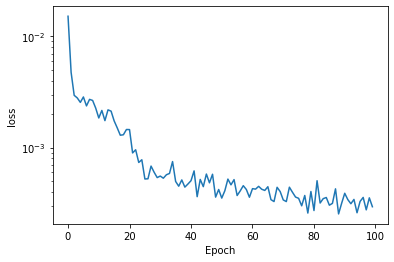

In [10]:
plt.plot(loss)
plt.yscale("log")
plt.ylabel("loss")
plt.xlabel("Epoch")